In [2]:
print("hello world")

hello world


In [5]:
https://raw.githubusercontent.com/amankharwal/Fremont-Bridge-Bicycle-Counts/master/fremont-bridge.csv


SyntaxError: invalid syntax (2778113668.py, line 1)

In [25]:
import pandas as pd

data = pd.read_csv(r'C:\Users\siddh\Downloads\fremont-bridge.csv', index_col= 'Date',)
data.head()

,West,East
Date,,
10/3/2012 0:00,4.0,9.0
10/3/2012 1:00,4.0,6.0
10/3/2012 2:00,1.0,1.0
10/3/2012 3:00,2.0,3.0
10/3/2012 4:00,6.0,1.0


In [27]:
data.columns = ["West", "East"]
data["Total"] = data["West"] + data["East"] 
data.head()

,West,East,Total
Date,,,
10/3/2012 0:00,4.0,9.0,13.0
10/3/2012 1:00,4.0,6.0,10.0
10/3/2012 2:00,1.0,1.0,2.0
10/3/2012 3:00,2.0,3.0,5.0
10/3/2012 4:00,6.0,1.0,7.0


In [29]:
data.dropna().describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


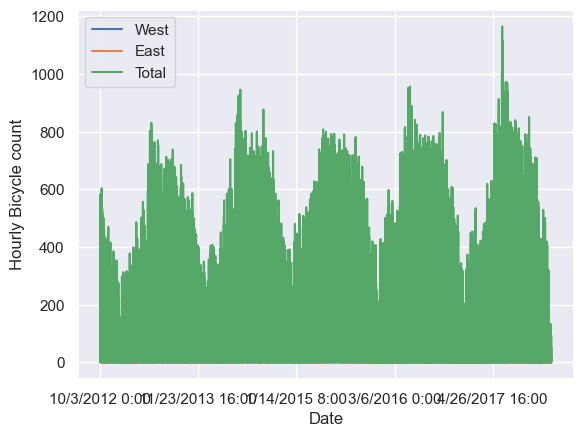

In [31]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

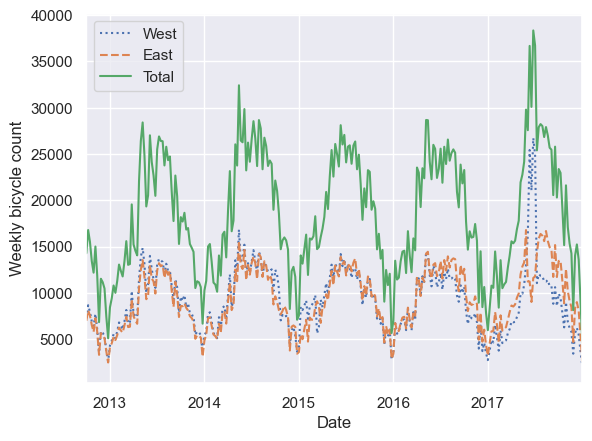

In [41]:
# Ensure that the index of the DataFrame is a DatetimeIndex
data.index = pd.to_datetime(data.index)  # Convert index to datetime if it's not already

# Now you can safely resample the data
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

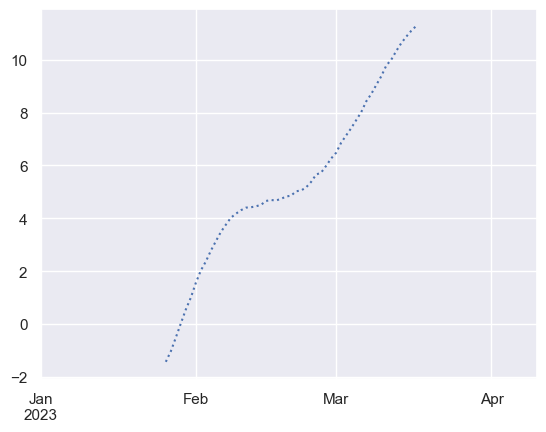

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example: Creating a sample DataFrame with daily data
# Here we create a date range and some random data
date_range = pd.date_range(start='2023-01-01', periods=100)
data = np.random.randn(100)  # Random data for demonstration
daily = pd.Series(data, index=date_range)  # Define 'daily' as a Pandas Series

# Now you can use the rolling function on 'daily'
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])
plt.show()

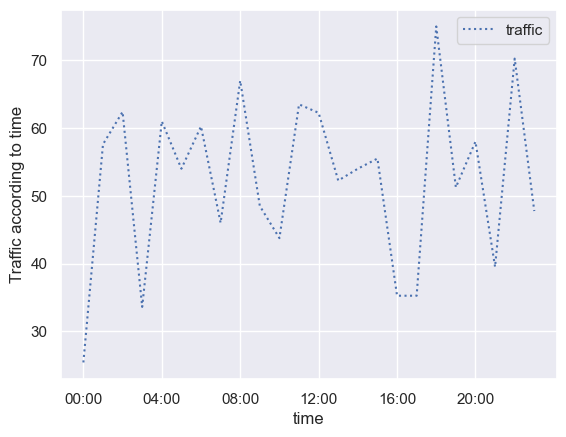

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is a NumPy array, we need to convert it to a Pandas DataFrame
# For example, let's create a DataFrame with a datetime index
# Replace this with your actual data loading method
data = pd.DataFrame({
    'traffic': np.random.randint(0, 100, size=100)  # Example traffic data
}, index=pd.date_range(start='2023-01-01', periods=100, freq='h'))

# Now we can group by time
by_time = data.groupby(data.index.time).mean()

# Set hourly ticks for the x-axis
hourly_ticks = 4 * 60 * 60 * np.arange(6)

# Plotting
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()